In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("../sigRF/data/stroke_risk_dataset.csv")

In [3]:
print(df.columns)

Index(['Chest Pain', 'Shortness of Breath', 'Irregular Heartbeat',
       'Fatigue & Weakness', 'Dizziness', 'Swelling (Edema)',
       'Pain in Neck/Jaw/Shoulder/Back', 'Excessive Sweating',
       'Persistent Cough', 'Nausea/Vomiting', 'High Blood Pressure',
       'Chest Discomfort (Activity)', 'Cold Hands/Feet', 'Snoring/Sleep Apnea',
       'Anxiety/Feeling of Doom', 'Age', 'Stroke Risk (%)',
       'At Risk (Binary)'],
      dtype='object')


In [4]:
df.head()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,58.0,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,40.5,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,52.0,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,60.0,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,56.5,1


In [5]:
df.dropna(inplace = True)

In [6]:
df.shape

(70000, 18)

In [7]:
df.columns

Index(['Chest Pain', 'Shortness of Breath', 'Irregular Heartbeat',
       'Fatigue & Weakness', 'Dizziness', 'Swelling (Edema)',
       'Pain in Neck/Jaw/Shoulder/Back', 'Excessive Sweating',
       'Persistent Cough', 'Nausea/Vomiting', 'High Blood Pressure',
       'Chest Discomfort (Activity)', 'Cold Hands/Feet', 'Snoring/Sleep Apnea',
       'Anxiety/Feeling of Doom', 'Age', 'Stroke Risk (%)',
       'At Risk (Binary)'],
      dtype='object')

In [8]:
df.drop("Stroke Risk (%)", axis = 1, inplace=True)

In [9]:
X = df.drop("At Risk (Binary)", axis = 1)
y = df[["At Risk (Binary)"]]

In [10]:
X.columns = ['Chest Pain', 'Shortness of Breath', 'Irregular Heartbeat',
       'Fatigue_AND_ Weakness', 'Dizziness', 'Swelling',
       'Pain in Neck_Jaw_Shoulder_Back', 'Excessive Sweating',
       'Persistent Cough', 'Nausea/Vomiting', 'High Blood Pressure',
       'Chest Discomfort', 'Cold Hands_Feet', 'Snoring_Sleep Apnea',
       'Anxiety_Feeling of Doom', 'Age']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =42)

In [12]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

/Users/Gomes-FerreiraA-Dev/workspace/sigRDF/.venv/lib/python3.12/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [13]:
y_pred = rf.predict(X_test)

In [14]:
from sklearn.metrics import f1_score, confusion_matrix
print("F1 Score: ",f1_score(y_pred, y_test))


F1 Score:  0.9592423966490621


In [15]:
confusion_matrix(y_pred, y_test)

array([[ 6713,   439],
       [  680, 13168]])

In [16]:
df["At Risk (Binary)"].value_counts()

At Risk (Binary)
1    45444
0    24556
Name: count, dtype: int64

## Extracting decision paths

In [17]:
from sigRF.decision_path import get_decision_paths, extract_rule_paths, extract_tree_paths

In [18]:
decision_paths = get_decision_paths(rf, X_train)

In [19]:
# decision_paths

In [20]:
feature_names = X_train.columns

In [21]:
all_rule_texts = []
for est in rf.estimators_:
    rules = extract_rule_paths(est, feature_names)
    all_rule_texts.extend(rules)
all_rule_texts[0]

'(Cold Hands_Feet <= 0.50) AND (Dizziness <= 0.50) AND (Age <= 57.50) AND (Persistent Cough <= 0.50) AND (Snoring_Sleep Apnea <= 0.50) AND (Age <= 48.50) AND (Swelling <= 0.50) AND (Anxiety_Feeling of Doom <= 0.50) AND (Age <= 45.50)'

In [22]:
from sigRF.encode_decode import encode_rule_structure
# Encode the rules
encoded_rules = encode_rule_structure(all_rule_texts, columns= X_train.columns)

# Show some of the encoded rules
for i in range(5):
    print(encoded_rules[i])


FEAT_4_LTE_0.50) AND FEAT_5_LTE_0.50) AND FEAT_0_LTE_57.50) AND FEAT_12_LTE_0.50) AND FEAT_14_LTE_0.50) AND FEAT_0_LTE_48.50) AND FEAT_15_LTE_0.50) AND FEAT_1_LTE_0.50) AND FEAT_0_LTE_45.50)
FEAT_4_LTE_0.50) AND FEAT_5_LTE_0.50) AND FEAT_0_LTE_57.50) AND FEAT_12_LTE_0.50) AND FEAT_14_LTE_0.50) AND FEAT_0_LTE_48.50) AND FEAT_15_LTE_0.50) AND FEAT_1_LTE_0.50) AND FEAT_0_GT_45.50) AND FEAT_0_LTE_46.50) AND FEAT_9_LTE_0.50)
FEAT_4_LTE_0.50) AND FEAT_5_LTE_0.50) AND FEAT_0_LTE_57.50) AND FEAT_12_LTE_0.50) AND FEAT_14_LTE_0.50) AND FEAT_0_LTE_48.50) AND FEAT_15_LTE_0.50) AND FEAT_1_LTE_0.50) AND FEAT_0_GT_45.50) AND FEAT_0_LTE_46.50) AND FEAT_9_GT_0.50)
FEAT_4_LTE_0.50) AND FEAT_5_LTE_0.50) AND FEAT_0_LTE_57.50) AND FEAT_12_LTE_0.50) AND FEAT_14_LTE_0.50) AND FEAT_0_LTE_48.50) AND FEAT_15_LTE_0.50) AND FEAT_1_LTE_0.50) AND FEAT_0_GT_45.50) AND FEAT_0_GT_46.50)
FEAT_4_LTE_0.50) AND FEAT_5_LTE_0.50) AND FEAT_0_LTE_57.50) AND FEAT_12_LTE_0.50) AND FEAT_14_LTE_0.50) AND FEAT_0_LTE_48.50) AND FEA

In [23]:
# Function to decode an encoded rule
from sigRF.encode_decode import decode_rule_structure

# Example of decoding the encoded rules
encoded_rule_example = [encoded_rules[0]]  # Example encoded rule
decoded_rule = decode_rule_structure(encoded_rule_example, columns = X.columns)

# Show the decoded rule
print(decoded_rule[0])  # Example output: (mean radius <= 15.5) AND (mean smoothness > 20.1)


(Cold Hands_Feet <= 0.50)) AND (Dizziness <= 0.50)) AND (Age <= 57.50)) AND (Persistent Cough <= 0.50)) AND (Snoring_Sleep Apnea <= 0.50)) AND (Age <= 48.50)) AND (Swelling <= 0.50)) AND (Anxiety_Feeling of Doom <= 0.50)) AND (Age <= 45.50))


In [24]:
# from sigRF.SIG import create_sig
# ##User can directly create optimized SIG
# sig = create_sig(columns=X.columns, encoded_rules=encoded_rules)

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/Gomes-FerreiraA-Dev/workspace/sigRDF/.venv/lib/python3.12/site-packages/pulp/apis/../solverdir/cbc/osx/i64/cbc /var/folders/p0/0hqzynfj21zb2ybr_l6r63tr0000gp/T/892899f1f63744c08b3343573d2eac24-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/p0/0hqzynfj21zb2ybr_l6r63tr0000gp/T/892899f1f63744c08b3343573d2eac24-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 6 COLUMNS
At line 971 RHS
At line 973 BOUNDS
At line 1215 ENDATA
Problem MODEL has 1 rows, 241 columns and 241 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 1.07154e+06 - 0.00 seconds
Cgl0004I processed model has 1 rows, 241 columns (241 integer (241 of which binary)) and 241 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -1.07154e+06
Cbc0038I Before 

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

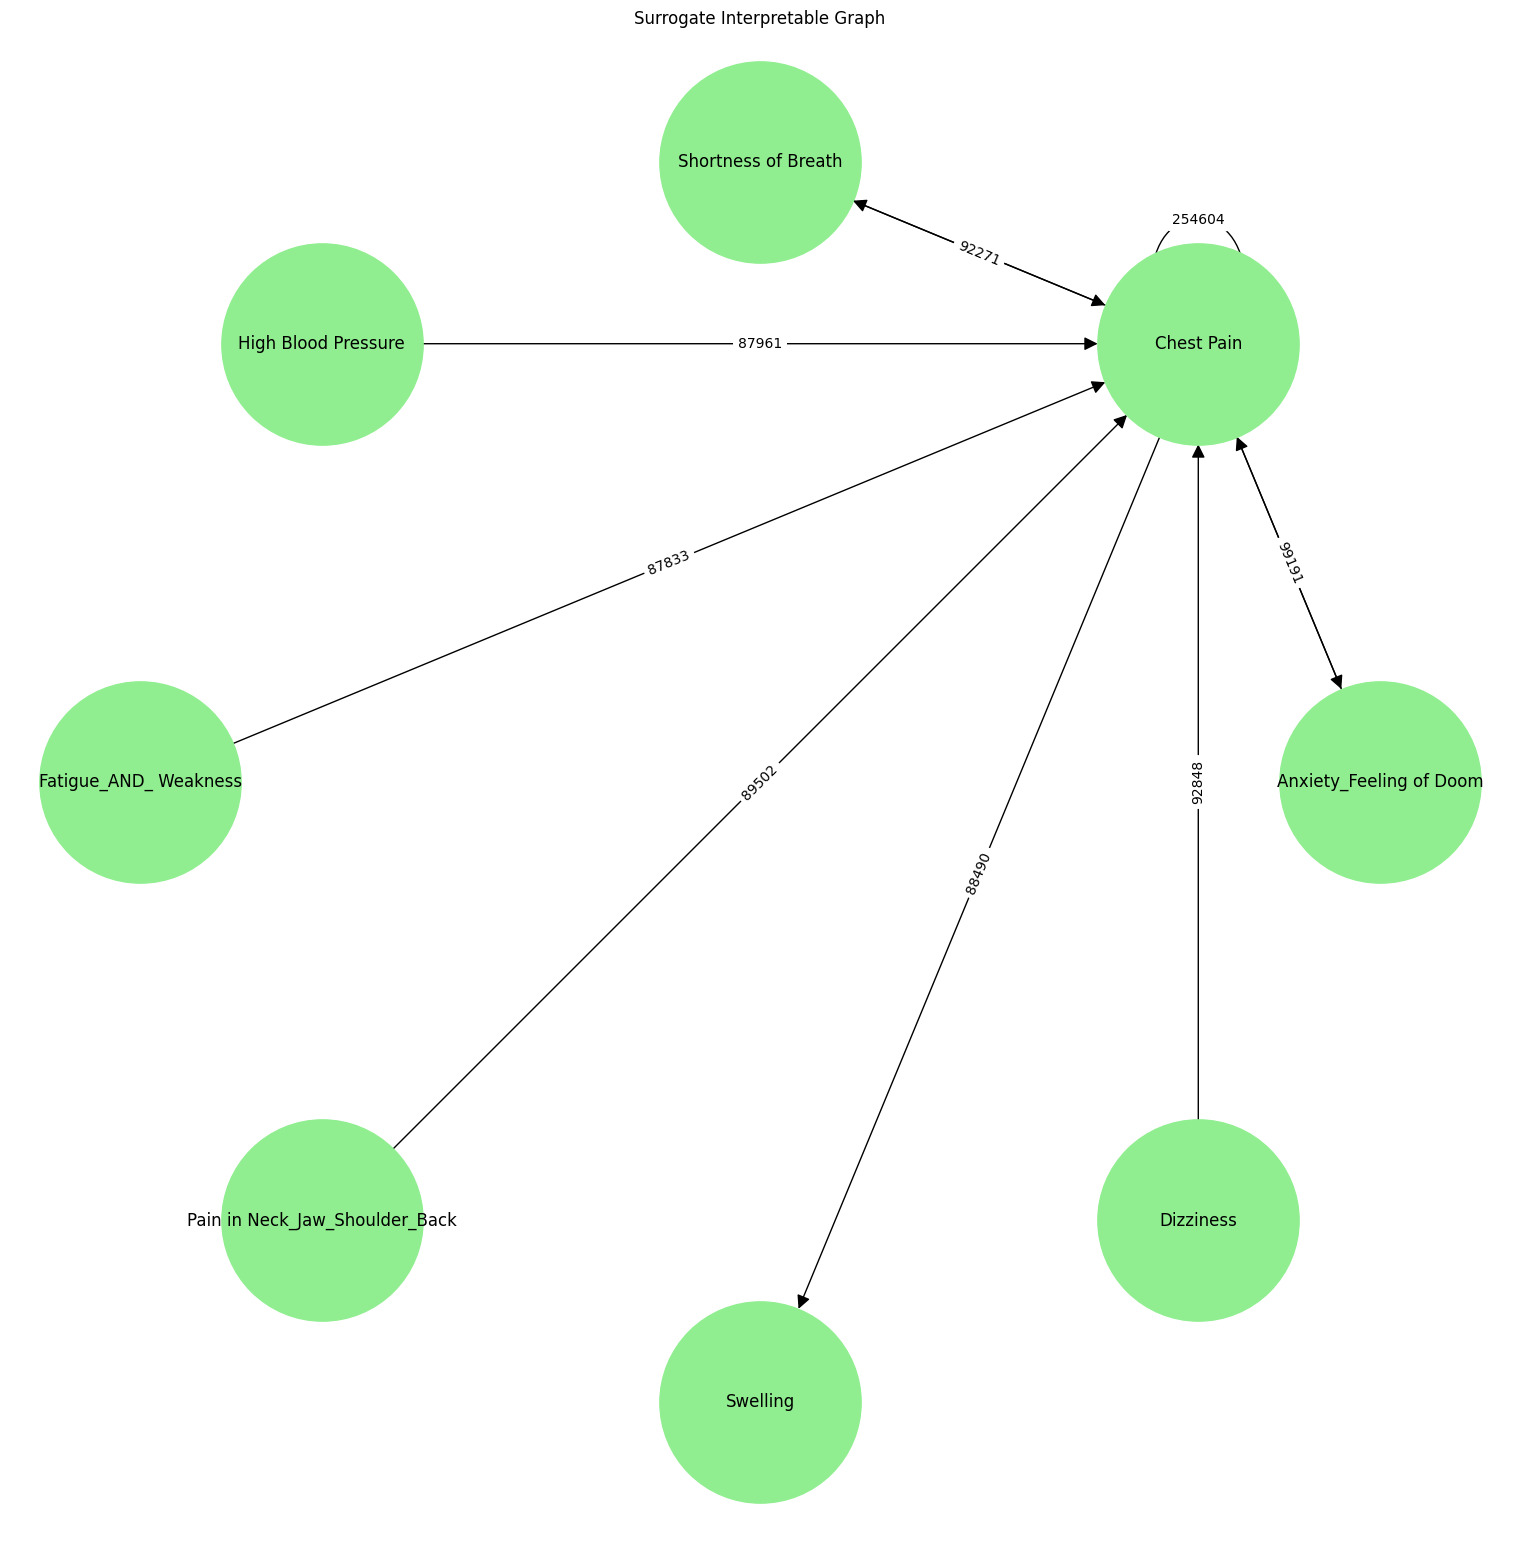

In [25]:
from sigRF.SIG import create_sig_optimized
sig_optimized  = create_sig_optimized(columns=X.columns, encoded_rules=encoded_rules, max_edges=10)

In [26]:
sig_optimized.remove_edge('Chest Pain', 'Chest Pain')

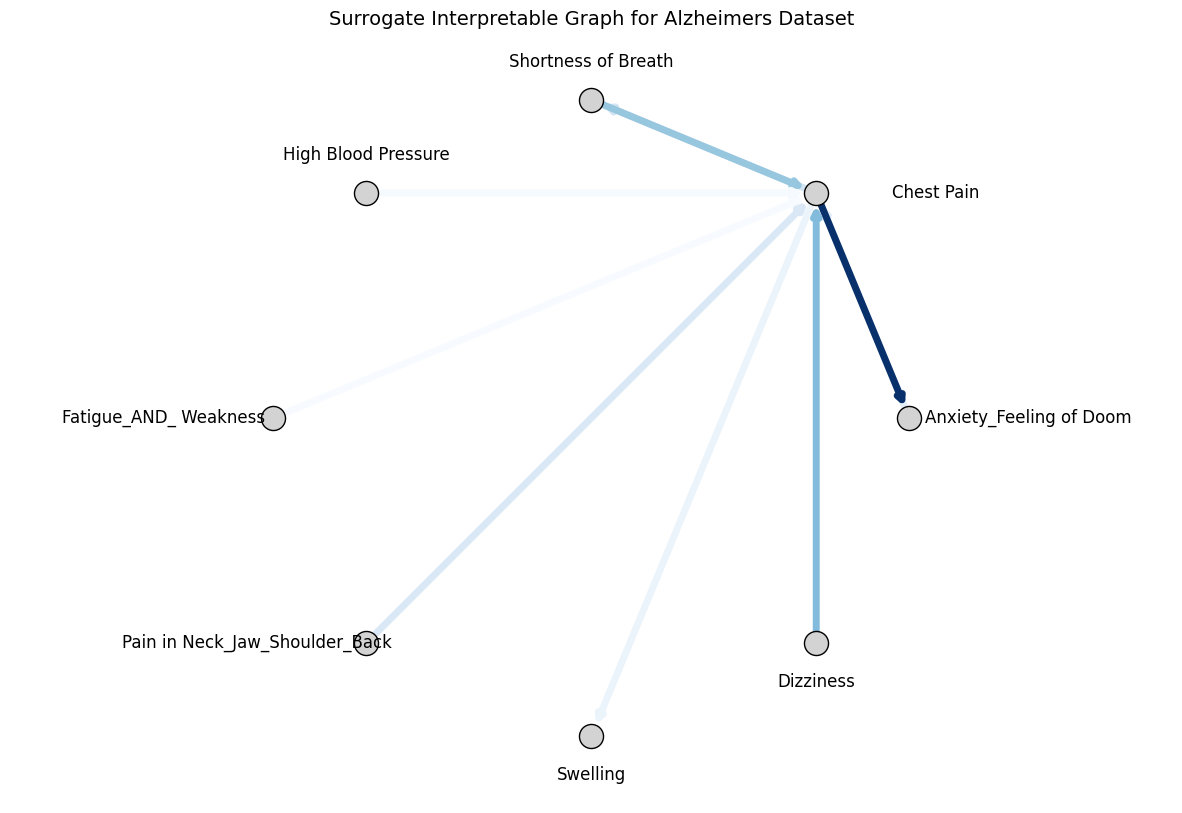

In [27]:
from sigRF.SIG import beautify
beautify(sig_optimized)

## Interpretation of the SIG

## This is an example of the lack of shortage of the data. The data is not enough to predict the stroke. After, the domain validation, following are the key takeaways:

## Assessment of Provided Symptom Chains for Stroke Diagnosis

### Key Diagnostic Criteria for Stroke

- **Stroke is characterized by sudden onset of focal neurological deficits** such as unilateral weakness, numbness, speech disturbance, vision changes, or loss of coordination[1][2][4][5][6][7][8].
- **Non-specific symptoms** like chest pain, shortness of breath, anxiety, swelling, or pain in the neck/shoulder/jaw/back are not considered core features for diagnosing stroke[2][4][5][6].

Below is an expert evaluation of each symptom chain in relation to stroke diagnosis:

---

| Symptom Chain | Does it validate/support stroke diagnosis? | Explanation |
|---------------|--------------------------------------------|-------------|
| 1. High Blood pressure → Chest Pain → Shortness of Breath | **No** | These are more indicative of acute cardiac conditions (e.g., myocardial infarction, heart failure) rather than stroke. None are core stroke symptoms[2][4][5][6]. |
| 2. High Blood pressure → Chest Pain → Feeling Anxious | **No** | Anxiety and chest pain are not specific for stroke; this chain points more toward cardiac or anxiety disorders[2][4][5][6]. |
| 3. Fatigue and weakness → Chest Pain → Shortness of Breath | **No** | General fatigue/weakness (not focal), chest pain, and shortness of breath are not typical for stroke; focal weakness is required[2][4][5][6]. |
| 4. Fatigue and weakness → Chest Pain → Feeling Anxious | **No** | As above, these symptoms are non-specific and not diagnostic for stroke[2][4][5][6]. |
| 5. Pain in Neck/Shoulder/Jaw/Back → Chest Pain → Shortness of Breath | **No** | These are classic for cardiac ischemia, not stroke[2][4][5][6]. |
| 6. Pain in Neck/Shoulder/Jaw/Back → Chest Pain → Feeling Anxious | **No** | Again, this symptom cluster suggests cardiac or anxiety etiologies, not stroke[2][4][5][6]. |
| 7. Dizziness → Chest Pain → Shortness of Breath | **No** | Dizziness alone is not sufficient for stroke diagnosis, especially with chest pain and shortness of breath; these suggest cardiac or vestibular problems[2][4][5][6]. |
| 8. Dizziness → Chest Pain → Feeling Anxious | **No** | Dizziness and anxiety are not specific for stroke; chest pain is not a core stroke symptom[2][4][5][6]. |
| 9. High Blood pressure → Chest Pain → Swelling | **No** | Swelling (e.g., peripheral edema) is not a stroke symptom; this cluster is more consistent with heart failure[2][4][5][6]. |
| 10. Fatigue and weakness → Chest Pain → Swelling | **No** | Same as above; not supportive of stroke diagnosis[2][4][5][6]. |
| 11. Pain in Neck/Shoulder/Jaw/Back → Chest Pain → Swelling | **No** | This pattern is typical of cardiac conditions, not stroke[2][4][5][6]. |
| 12. Dizziness → Chest Pain → Swelling | **No** | Dizziness and swelling are not stroke-specific and, together with chest pain, suggest cardiac or other systemic conditions[2][4][5][6]. |

---

## Summary

- **None of the provided symptom chains are diagnostic or supportive of stroke.**
- **Stroke diagnosis relies on sudden onset of focal neurological deficits** (e.g., facial droop, unilateral arm weakness, speech disturbance), not the non-specific or cardiac-related symptoms listed above[1][2][4][5][6][7][8].
- **High blood pressure is a risk factor for stroke** but, in the absence of focal neurological signs, does not validate the diagnosis[2][4][5][6].

**In clinical practice, the F.A.S.T. criteria and sudden focal neurological symptoms are the primary features that support a stroke diagnosis.**

Citations:
[1] https://www.mayoclinic.org/diseases-conditions/stroke/diagnosis-treatment/drc-20350119
[2] https://www.cuore.iss.it/eurociss/reg_ictus/pdf/ictus_criteri-diagnostici.pdf
[3] https://www.nhs.uk/conditions/stroke/diagnosis/
[4] https://pmc.ncbi.nlm.nih.gov/articles/PMC2722757/
[5] https://www.stroke.org/en/about-stroke/stroke-symptoms
[6] https://www.cdc.gov/stroke/signs-symptoms/index.html
[7] https://www.aafp.org/pubs/afp/issues/2015/0415/p528.html
[8] https://www.stroke.org.uk/stroke/symptoms

---